In [16]:
!pip install numpy pandas matplotlib scikit-learn tensorflow pillow kaggle opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import os
from zipfile import ZipFile
from pathlib import Path

# --- change this only if the path is different ---
ZIP_PATH = r"C:\Users\Sumana Sarkar\Downloads\galaxy-zoo-the-galaxy-challenge.zip"

# Where we'll extract selected inner zips
WORK_DIR = Path.cwd() / "galaxy_data"   # notebook working directory: ./galaxy_data
WORK_DIR.mkdir(exist_ok=True)

print("Notebook working dir:", WORK_DIR)
print("Top-level zip path exists:", Path(ZIP_PATH).exists())

# List top-level zip contents
with ZipFile(ZIP_PATH, 'r') as z:
    names = z.namelist()
print("Top-level zip contains", len(names), "entries; sample:")
for p in names[:50]:
    print(" ", p)

Notebook working dir: C:\Users\Sumana Sarkar\galaxy_data
Top-level zip path exists: True
Top-level zip contains 6 entries; sample:
  all_ones_benchmark.zip
  all_zeros_benchmark.zip
  central_pixel_benchmark.zip
  images_test_rev1.zip
  images_training_rev1.zip
  training_solutions_rev1.zip


In [19]:
inner_to_extract = [
    "images_training_rev1.zip",
    "training_solutions_rev1.zip",
    "images_test_rev1.zip"
]

with ZipFile(ZIP_PATH, 'r') as z:
    for inner in inner_to_extract:
        if inner in z.namelist():
            target = WORK_DIR / inner
            if target.exists():
                print(f"{inner} already exists; skipping extract.")
            else:
                print("Extracting", inner, "to", target)
                with z.open(inner) as inner_file, open(target, 'wb') as f:
                    f.write(inner_file.read())
        else:
            print("WARNING: inner zip not found in top-level zip:", inner)


Extracting images_training_rev1.zip to C:\Users\Sumana Sarkar\galaxy_data\images_training_rev1.zip
Extracting training_solutions_rev1.zip to C:\Users\Sumana Sarkar\galaxy_data\training_solutions_rev1.zip
Extracting images_test_rev1.zip to C:\Users\Sumana Sarkar\galaxy_data\images_test_rev1.zip


In [20]:
# destination folders
TRAIN_IMG_DIR = WORK_DIR / "images_training"
TEST_IMG_DIR  = WORK_DIR / "images_test"
LABELS_DIR   = WORK_DIR / "labels"
TRAIN_IMG_DIR.mkdir(exist_ok=True)
TEST_IMG_DIR.mkdir(exist_ok=True)
LABELS_DIR.mkdir(exist_ok=True)

# helper to unzip inner zip to target dir
def unzip_file(zipfile_path, target_dir, show_count=10):
    from zipfile import ZipFile
    zipfile_path = Path(zipfile_path)
    print(f"Unzipping {zipfile_path} → {target_dir}")
    with ZipFile(zipfile_path, 'r') as z:
        z.extractall(target_dir)
    print("Done. files in target (sample):")
    sample = list(Path(target_dir).glob("*"))[:show_count]
    for s in sample:
        print(" ", s.name)

# Extract training images (this is large; sample mode below)
inner_train_zip = WORK_DIR / "images_training_rev1.zip"
if inner_train_zip.exists():
    unzip_file(inner_train_zip, TRAIN_IMG_DIR)
else:
    print("images_training_rev1.zip not found at", inner_train_zip)

# Extract labels CSV
inner_labels_zip = WORK_DIR / "training_solutions_rev1.zip"
if inner_labels_zip.exists():
    # unzip into LABELS_DIR; should contain a CSV
    unzip_file(inner_labels_zip, LABELS_DIR)
else:
    print("training_solutions_rev1.zip not found at", inner_labels_zip)

# optional: test zip
inner_test_zip = WORK_DIR / "images_test_rev1.zip"
if inner_test_zip.exists():
    unzip_file(inner_test_zip, TEST_IMG_DIR)
else:
    print("images_test_rev1.zip not found (test set).")

Unzipping C:\Users\Sumana Sarkar\galaxy_data\images_training_rev1.zip → C:\Users\Sumana Sarkar\galaxy_data\images_training
Done. files in target (sample):
  images_training_rev1
Unzipping C:\Users\Sumana Sarkar\galaxy_data\training_solutions_rev1.zip → C:\Users\Sumana Sarkar\galaxy_data\labels
Done. files in target (sample):
  training_solutions_rev1.csv
Unzipping C:\Users\Sumana Sarkar\galaxy_data\images_test_rev1.zip → C:\Users\Sumana Sarkar\galaxy_data\images_test
Done. files in target (sample):
  images_test_rev1


In [21]:
import pandas as pd
import glob

# find the CSV inside LABELS_DIR
csv_files = list(LABELS_DIR.glob("*.csv")) + list(LABELS_DIR.glob("*.tsv"))
print("Found label files:", csv_files)
labels_csv = csv_files[0]  # choose first found
print("Using labels file:", labels_csv)

labels = pd.read_csv(labels_csv)
labels.head()

Found label files: [WindowsPath('C:/Users/Sumana Sarkar/galaxy_data/labels/training_solutions_rev1.csv')]
Using labels file: C:\Users\Sumana Sarkar\galaxy_data\labels\training_solutions_rev1.csv


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [22]:
print("shape:", labels.shape)
cols = labels.columns.tolist()
print("first 20 columns:", cols[:20])
print("last 20 columns:", cols[-20:])
# Detect vote-fraction columns (exclude image id column names commonly 'img_id' or 'IMG_ID' etc.)
vote_cols = [c for c in cols if c.lower() not in ('img_id','image_id','imgid','id','img')]
len(vote_cols), vote_cols[:10]

shape: (61578, 38)
first 20 columns: ['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3', 'Class8.1']
last 20 columns: ['Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6']


(38,
 ['GalaxyID',
  'Class1.1',
  'Class1.2',
  'Class1.3',
  'Class2.1',
  'Class2.2',
  'Class3.1',
  'Class3.2',
  'Class4.1',
  'Class4.2'])

In [23]:
# Determine vote-fraction columns (exclude GalaxyID-like columns)
possible_id_names = {'GalaxyID','galaxyid','img_id','IMG_ID','ImageId','id','ID'}
cols = labels.columns.tolist()
vote_cols = [c for c in cols if c not in possible_id_names]
print("Number of vote columns found:", len(vote_cols))
print("First vote columns:", vote_cols[:12])
# create unified image id column
if 'GalaxyID' in labels.columns:
    labels = labels.rename(columns={'GalaxyID':'img_id'})
elif 'img_id' in labels.columns:
    labels = labels.rename(columns={'img_id':'img_id'})
else:
    # fallback: first column assumed to be id
    labels = labels.rename(columns={labels.columns[0]:'img_id'})
print("Using image id column:", 'img_id')
# Top answer (column with largest vote fraction)
labels['top_answer_col'] = labels[vote_cols].idxmax(axis=1)
labels[['img_id','top_answer_col']].head()


Number of vote columns found: 37
First vote columns: ['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3']
Using image id column: img_id


,img_id,top_answer_col
0,100008,Class6.2
1,100023,Class6.2
2,100053,Class6.2
3,100078,Class1.1
4,100090,Class6.2


In [24]:
def map_top_to_coarse(colname):
    s = str(colname).lower()
    # Heuristic mapping tuned for Galaxy Zoo ClassX.Y naming:
    # Class1.* typically corresponds to top-level "smooth / features or disk / star/artifact"
    # Class1.1 -> smooth (elliptical), Class1.2 -> features/disk (spiral), Class1.3 -> star/artifact (other)
    if s.startswith('class1.1') or 'class1.1' in s:
        return 'elliptical'
    if s.startswith('class1.2') or 'class1.2' in s:
        return 'spiral'
    if s.startswith('class1.3') or 'class1.3' in s:
        return 'other'
    # fallback lookups for keywords (in case column names contain words)
    if 'smooth' in s or 'elliptical' in s:
        return 'elliptical'
    if 'spiral' in s or 'arm' in s or 'disk' in s or 'features' in s:
        return 'spiral'
    if 'merger' in s or 'odd' in s or 'artifact' in s or 'star' in s:
        return 'other'
    # last fallback
    return 'other'

labels['target'] = labels['top_answer_col'].apply(map_top_to_coarse)
print(labels['target'].value_counts())
labels[['img_id','top_answer_col','target']].head(10)

target
other         40189
spiral        15940
elliptical     5449
Name: count, dtype: int64


,img_id,top_answer_col,target
0,100008,Class6.2,other
1,100023,Class6.2,other
2,100053,Class6.2,other
3,100078,Class1.1,elliptical
4,100090,Class6.2,other
5,100122,Class6.2,other
6,100123,Class6.1,other
7,100128,Class1.1,elliptical
8,100134,Class1.2,spiral
9,100143,Class1.2,spiral


In [25]:
# Some CSVs use GalaxyID without leading zeros; images are <GalaxyID>.jpg
# check first few ids, and whether images exist
sample_ids = labels['img_id'].astype(str).head(10).tolist()
print("sample ids:", sample_ids)
for sid in sample_ids:
    p = TRAIN_IMG_DIR / f"{sid}.jpg"
    print(sid, "exists?", p.exists())
# show a sample image if available
for sid in sample_ids[:3]:
    p = TRAIN_IMG_DIR / f"{sid}.jpg"
    if p.exists():
        display(Image.open(p))
    else:
        print("Missing image for id:", sid)

sample ids: ['100008', '100023', '100053', '100078', '100090', '100122', '100123', '100128', '100134', '100143']
100008 exists? False
100023 exists? False
100053 exists? False
100078 exists? False
100090 exists? False
100122 exists? False
100123 exists? False
100128 exists? False
100134 exists? False
100143 exists? False
Missing image for id: 100008
Missing image for id: 100023
Missing image for id: 100053


In [28]:
from pathlib import Path

WORK_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data")   # your working folder
print("WORK_DIR:", WORK_DIR, "exists?", WORK_DIR.exists())

jpgs = list(WORK_DIR.rglob("*.jpg"))
print("Total .jpg files found under WORK_DIR:", len(jpgs))
print("Sample (first 40):")
for p in jpgs[:40]:
    print(" ", p)

WORK_DIR: C:\Users\Sumana Sarkar\galaxy_data exists? True
Total .jpg files found under WORK_DIR: 141553
Sample (first 40):
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100018.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100037.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100042.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100052.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100056.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100058.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100062.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100065.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100071.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100076.jpg
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1\100084.jpg
  C:\Users\Sumana Sarkar\galax

In [29]:
from pathlib import Path

WORK_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data")
print("WORK_DIR exists?", WORK_DIR.exists())

# find folder with the largest number of jpgs (search depth arbitrary)
best_dir = None
best_count = 0
for d in WORK_DIR.rglob("*"):
    if d.is_dir():
        cnt = sum(1 for _ in d.glob("*.jpg"))
        if cnt > best_count:
            best_count = cnt
            best_dir = d

print("Best candidate folder with most .jpg files:", best_dir)
print("Number of .jpg files there:", best_count)
# list a sample of files
if best_dir:
    sample = list(best_dir.glob("*.jpg"))[:20]
    print("Sample files:", [p.name for p in sample])


WORK_DIR exists? True
Best candidate folder with most .jpg files: C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1
Number of .jpg files there: 79975
Sample files: ['100018.jpg', '100037.jpg', '100042.jpg', '100052.jpg', '100056.jpg', '100058.jpg', '100062.jpg', '100065.jpg', '100071.jpg', '100076.jpg', '100084.jpg', '100085.jpg', '100094.jpg', '100104.jpg', '100171.jpg', '100183.jpg', '100186.jpg', '100190.jpg', '100208.jpg', '100222.jpg']


In [30]:
from pathlib import Path
WORK_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data")

# 1) find folders with many .jpg files and print counts (helps locate training folder)
candidates = []
for d in WORK_DIR.rglob("*"):
    if d.is_dir():
        cnt = sum(1 for _ in d.glob("*.jpg"))
        if cnt>0:
            candidates.append((d, cnt))
# sort descending by count
candidates = sorted(candidates, key=lambda x: x[1], reverse=True)
print("Top candidate folders with jpg counts (top 6):")
for d,c in candidates[:6]:
    print(f"  {d}  -> {c}")

# 2) auto-select the folder whose jpg count is closest to the labels length (61578)
labels_count = 61578
best = min(candidates, key=lambda x: abs(x[1]-labels_count)) if candidates else (None,0)
print("\nAuto-picked best candidate for TRAIN_IMG_DIR (closest to 61578 images):")
print(best)
TRAIN_IMG_DIR = best[0]
print("Set TRAIN_IMG_DIR =", TRAIN_IMG_DIR)


Top candidate folders with jpg counts (top 6):
  C:\Users\Sumana Sarkar\galaxy_data\images_test\images_test_rev1  -> 79975
  C:\Users\Sumana Sarkar\galaxy_data\images_training\images_training_rev1  -> 61578

Auto-picked best candidate for TRAIN_IMG_DIR (closest to 61578 images):
(WindowsPath('C:/Users/Sumana Sarkar/galaxy_data/images_training/images_training_rev1'), 61578)
Set TRAIN_IMG_DIR = C:\Users\Sumana Sarkar\galaxy_data\images_training\images_training_rev1


In [31]:
import pandas as pd
LABELS_CSV = WORK_DIR / "labels" / "training_solutions_rev1.csv"
labels = pd.read_csv(LABELS_CSV)
# unify id column name
if 'GalaxyID' in labels.columns:
    labels = labels.rename(columns={'GalaxyID':'img_id'})
sample_ids = labels['img_id'].astype(str).head(10).tolist()
print("Sample ids:", sample_ids)
for sid in sample_ids:
    p = TRAIN_IMG_DIR / f"{sid}.jpg"
    print(sid, "exists?", p.exists())

Sample ids: ['100008', '100023', '100053', '100078', '100090', '100122', '100123', '100128', '100134', '100143']
100008 exists? True
100023 exists? True
100053 exists? True
100078 exists? True
100090 exists? True
100122 exists? True
100123 exists? True
100128 exists? True
100134 exists? True
100143 exists? True


In [36]:
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,4)

WORK_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data")
TRAIN_IMG_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data/images_training/images_training_rev1")
LABELS_CSV = WORK_DIR / "labels" / "training_solutions_rev1.csv"

print("WORK_DIR:", WORK_DIR.exists())
print("TRAIN_IMG_DIR:", TRAIN_IMG_DIR, "exists?", TRAIN_IMG_DIR.exists(), "jpg_count:", len(list(TRAIN_IMG_DIR.glob("*.jpg"))))
print("Labels CSV exists?", LABELS_CSV.exists())


WORK_DIR: True
TRAIN_IMG_DIR: C:\Users\Sumana Sarkar\galaxy_data\images_training\images_training_rev1 exists? True jpg_count: 61578
Labels CSV exists? True


In [37]:
labels = pd.read_csv(LABELS_CSV)
# unify id column
if 'GalaxyID' in labels.columns:
    labels = labels.rename(columns={'GalaxyID':'img_id'})
labels['img_id'] = labels['img_id'].astype(str)

# detect vote columns and top-answer
exclude = {'img_id','GalaxyID','Id','ID','id'}
vote_cols = [c for c in labels.columns if c not in exclude]
labels['top_answer_col'] = labels[vote_cols].idxmax(axis=1)

# map Class1.1/1.2/1.3 -> elliptical/spiral/other (conservative)
def map_top(col):
    s = str(col).lower()
    if 'class1.1' in s: return 'elliptical'
    if 'class1.2' in s: return 'spiral'
    if 'class1.3' in s: return 'other'
    if 'smooth' in s: return 'elliptical'
    if any(k in s for k in ['feature','disk','arm','spiral']): return 'spiral'
    return 'other'

labels['target'] = labels['top_answer_col'].apply(map_top)
print(labels['target'].value_counts())


target
other         40189
spiral        15940
elliptical     5449
Name: count, dtype: int64


Files found: 61578 / 61578


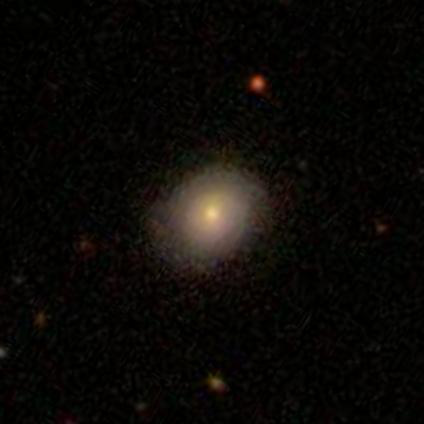

100008 other


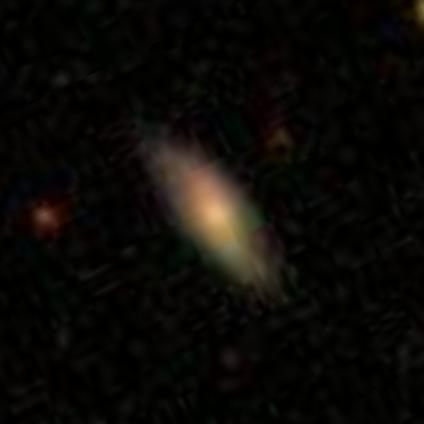

100023 other


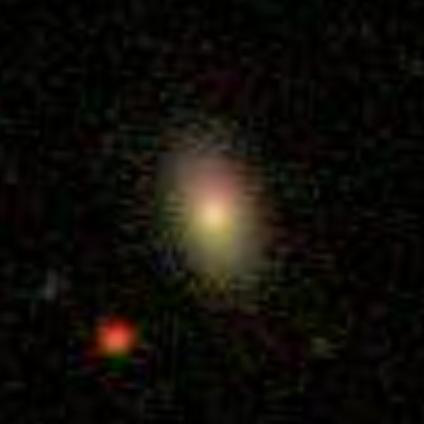

100053 other


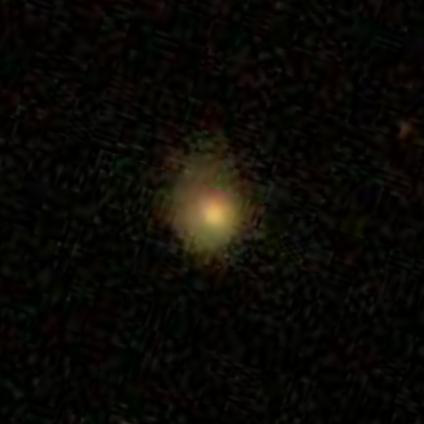

100078 elliptical


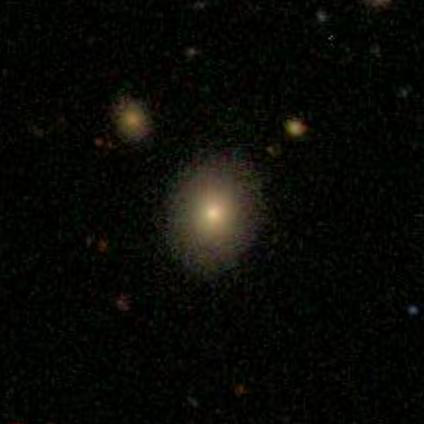

100090 other


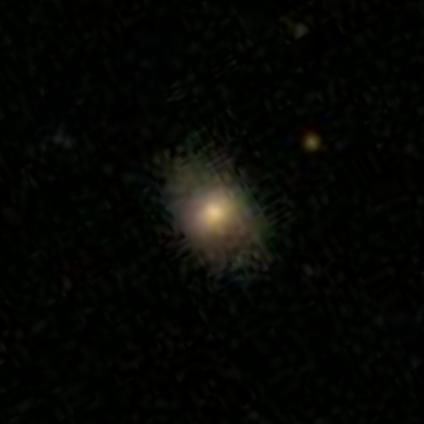

100122 other


In [38]:
# default filenames: "<GalaxyID>.jpg"
labels['img_filename'] = labels['img_id'].astype(str)
# build paths and check existence
labels['img_path'] = labels['img_filename'].apply(lambda fn: TRAIN_IMG_DIR / f"{fn}.jpg")
labels['file_exists'] = labels['img_path'].apply(lambda p: p.exists())
print("Files found:", labels['file_exists'].sum(), "/", len(labels))

# show a couple of sample images (first available)
sample = labels[labels['file_exists']].head(6)
for idx, row in sample.iterrows():
    display(Image.open(row['img_path']))
    print(row['img_id'], row['target'])


In [39]:
from sklearn.model_selection import train_test_split

SAMPLE_MODE = True   # -> True for fast iteration. Set False to use full dataset.
MAX_PER_CLASS = 2000  # per-class cap when SAMPLE_MODE True

df_available = labels[labels['file_exists']].copy()
if SAMPLE_MODE:
    df_use = df_available.groupby('target', group_keys=False).apply(lambda g: g.sample(n=min(len(g), MAX_PER_CLASS), random_state=42)).reset_index(drop=True)
else:
    df_use = df_available.reset_index(drop=True)

df_use = df_use[['img_filename','target']].rename(columns={'img_filename':'img_file'})
print("Using dataset rows:", len(df_use))
train_df, val_df = train_test_split(df_use, test_size=0.2, stratify=df_use['target'], random_state=42)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
print("train/val sizes:", train_df.shape, val_df.shape)


Using dataset rows: 6000
train/val sizes: (4800, 2) (1200, 2)


C:\Users\Sumana Sarkar\AppData\Local\Temp\ipykernel_10528\3053706713.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_use = df_available.groupby('target', group_keys=False).apply(lambda g: g.sample(n=min(len(g), MAX_PER_CLASS), random_state=42)).reset_index(drop=True)


In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128,128)   # quick; change to (224,224) later for better performance
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.15,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

def make_gen(df, datagen, shuffle=True):
    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=str(TRAIN_IMG_DIR),
        x_col='img_file',
        y_col='target',
        target_size=IMG_SIZE,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=shuffle,
        validate_filenames=True
    )

train_gen = make_gen(train_df, train_datagen, shuffle=True)
val_gen   = make_gen(val_df, val_datagen, shuffle=False)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 4800 invalid image filename(s) in x_col="img_file". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1200 invalid image filename(s) in x_col="img_file". These filename(s) will be ignored.
  warnings.warn(


In [41]:
from pathlib import Path
TRAIN_IMG_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data/images_training/images_training_rev1")

# print counts and a small filename sample
all_jpg = sorted([p.name for p in TRAIN_IMG_DIR.glob("*.jpg")])
print("Total JPG files in TRAIN_IMG_DIR:", len(all_jpg))
print("First 40 filenames (sample):")
for fn in all_jpg[:40]:
    print(" ", fn)

Total JPG files in TRAIN_IMG_DIR: 61578
First 40 filenames (sample):
  100008.jpg
  100023.jpg
  100053.jpg
  100078.jpg
  100090.jpg
  100122.jpg
  100123.jpg
  100128.jpg
  100134.jpg
  100143.jpg
  100150.jpg
  100157.jpg
  100187.jpg
  100204.jpg
  100237.jpg
  100259.jpg
  100263.jpg
  100288.jpg
  100295.jpg
  100322.jpg
  100335.jpg
  100367.jpg
  100380.jpg
  100382.jpg
  100383.jpg
  100402.jpg
  100428.jpg
  100434.jpg
  100444.jpg
  100445.jpg
  100458.jpg
  100474.jpg
  100479.jpg
  100506.jpg
  100513.jpg
  100520.jpg
  100541.jpg
  100561.jpg
  100571.jpg
  100601.jpg


In [42]:
from collections import defaultdict
from pathlib import Path
TRAIN_IMG_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data/images_training/images_training_rev1")

# map exact stem -> filename (stem = basename without suffix)
stem_to_filenames = defaultdict(list)
for p in TRAIN_IMG_DIR.glob("*.jpg"):
    stem = p.stem  # e.g., '100008' or 'img_100008' or '00100008'
    stem_to_filenames[stem].append(p.name)

# quick stats
print("Unique stems found:", len(stem_to_filenames))
# show some stems sample
sample_stems = list(stem_to_filenames.keys())[:30]
print("Sample stems:", sample_stems)


Unique stems found: 61578
Sample stems: ['100008', '100023', '100053', '100078', '100090', '100122', '100123', '100128', '100134', '100143', '100150', '100157', '100187', '100204', '100237', '100259', '100263', '100288', '100295', '100322', '100335', '100367', '100380', '100382', '100383', '100402', '100428', '100434', '100444', '100445']


In [43]:
import pandas as pd
from pathlib import Path
TRAIN_IMG_DIR = Path(r"C:/Users/Sumana Sarkar/galaxy_data/images_training/images_training_rev1")
labels = pd.read_csv(Path(r"C:/Users/Sumana Sarkar/galaxy_data/labels/training_solutions_rev1.csv"))

# unify id column
if 'GalaxyID' in labels.columns:
    labels = labels.rename(columns={'GalaxyID':'img_id'})
labels['img_id'] = labels['img_id'].astype(str)

# helper to test candidate stems
def find_filename_for_id(imgid, stems_map, folder):
    candidates = []
    # exact
    if imgid in stems_map:
        candidates.extend(stems_map[imgid])
    # prefixed
    pref = f"img_{imgid}"
    if pref in stems_map:
        candidates.extend(stems_map[pref])
    # uppercase prefix
    pref2 = f"IMG_{imgid}"
    if pref2 in stems_map:
        candidates.extend(stems_map[pref2])
    # suffix _0
    suff = f"{imgid}_0"
    if suff in stems_map:
        candidates.extend(stems_map[suff])
    # zero-padded attempts
    for width in (7,8,9,10):
        try:
            padded = f"{int(imgid):0{width}d}"
            if padded in stems_map:
                candidates.extend(stems_map[padded])
        except:
            pass
    # if still empty, do a substring search: any filename that contains the id
    if not candidates:
        for stem, names in stems_map.items():
            if imgid in stem:
                candidates.extend(names)
    # return the first candidate (deterministic sort)
    if candidates:
        return sorted(set(candidates))[0]
    return None

# build stems_map
from collections import defaultdict
stems_map = defaultdict(list)
for p in TRAIN_IMG_DIR.glob("*.jpg"):
    stems_map[p.stem].append(p.name)

# apply to the first N rows (or entire df)
labels['matched_filename'] = labels['img_id'].apply(lambda i: find_filename_for_id(i, stems_map, TRAIN_IMG_DIR))

# summary stats
matched_count = labels['matched_filename'].notna().sum()
total = len(labels)
print(f"Matched filenames: {matched_count} / {total}  ({matched_count/total:.2%})")

# show first few matched & unmatched examples
print("\nMatched examples:")
print(labels[labels['matched_filename'].notna()][['img_id','matched_filename']].head(10))
print("\nUnmatched examples (first 10):")
print(labels[labels['matched_filename'].isna()][['img_id']].head(10))


Matched filenames: 61578 / 61578  (100.00%)

Matched examples:
   img_id matched_filename
0  100008       100008.jpg
1  100023       100023.jpg
2  100053       100053.jpg
3  100078       100078.jpg
4  100090       100090.jpg
5  100122       100122.jpg
6  100123       100123.jpg
7  100128       100128.jpg
8  100134       100134.jpg
9  100143       100143.jpg

Unmatched examples (first 10):
Empty DataFrame
Columns: [img_id]
Index: []


In [44]:
# attach coarse label 'target' (same mapping we used earlier)
vote_cols = [c for c in labels.columns if c not in ('img_id','matched_filename')]
labels['top_answer_col'] = labels[[c for c in labels.columns if c.startswith('Class')]].idxmax(axis=1)
def map_top(col):
    s = str(col).lower()
    if 'class1.1' in s: return 'elliptical'
    if 'class1.2' in s: return 'spiral'
    if 'class1.3' in s: return 'other'
    if 'smooth' in s: return 'elliptical'
    if any(k in s for k in ['feature','disk','arm','spiral']): return 'spiral'
    return 'other'
labels['target'] = labels['top_answer_col'].apply(map_top)

# keep only found files
df_found = labels[labels['matched_filename'].notna()].copy()
df_found['img_file'] = df_found['matched_filename']  # exact filename including extension
print("Rows with actual files:", len(df_found))

# show per-class counts
print("Per-class counts:")
print(df_found['target'].value_counts())

# if you want a fast sample for iteration:
SAMPLE_MODE = True
CAP_PER_CLASS = 2000
if SAMPLE_MODE:
    df_use = df_found.groupby('target', group_keys=False).apply(lambda g: g.sample(n=min(len(g), CAP_PER_CLASS), random_state=42)).reset_index(drop=True)
else:
    df_use = df_found.reset_index(drop=True)

print("Using rows for modeling:", len(df_use))
df_use = df_use[['img_file','target']].rename(columns={'img_file':'img_file'})


Rows with actual files: 61578
Per-class counts:
target
other         40189
spiral        15940
elliptical     5449
Name: count, dtype: int64
Using rows for modeling: 6000


C:\Users\Sumana Sarkar\AppData\Local\Temp\ipykernel_10528\1108717597.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_use = df_found.groupby('target', group_keys=False).apply(lambda g: g.sample(n=min(len(g), CAP_PER_CLASS), random_state=42)).reset_index(drop=True)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_use, test_size=0.2, stratify=df_use['target'], random_state=42)
print("train/val sizes:", train_df.shape, val_df.shape)

IMG_SIZE = (128,128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.12,
                                   height_shift_range=0.12, horizontal_flip=True, zoom_range=0.15, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=str(TRAIN_IMG_DIR),
    x_col='img_file',
    y_col='target',
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    validate_filenames=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=str(TRAIN_IMG_DIR),
    x_col='img_file',
    y_col='target',
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    validate_filenames=True
)


train/val sizes: (4800, 2) (1200, 2)
Found 4800 validated image filenames belonging to 3 classes.
Found 1200 validated image filenames belonging to 3 classes.


In [47]:
# Inspect the generator to get number of classes and mapping
print("Train generator samples:", getattr(train_gen, "samples", "unknown"))
print("Train generator batch_size:", getattr(train_gen, "batch_size", "unknown"))

# class_indices is the recommended way
print("class_indices:", train_gen.class_indices)
num_classes = len(train_gen.class_indices)
print("num_classes:", num_classes)

# Now build EfficientNetB0 model (same as before)
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0

IMG_SIZE = (128,128)   # keep this until you switch to final runs
base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base.trainable = False

inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.35)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Train generator samples: 4800
Train generator batch_size: 32
class_indices: {'elliptical': 0, 'other': 1, 'spiral': 2}
num_classes: 3
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,379,302 (16.71 MB)

 Trainable params: 329,219 (1.26 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [48]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_galaxy_model.h5', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,   # short first; increase later
    callbacks=callbacks
)

model.save('galaxy_classifier_base.h5')


C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3272 - loss: 1.5830

150/150 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.3272 - loss: 1.5825 - val_accuracy: 0.3333 - val_loss: 1.1251 - learning_rate: 1.0000e-04
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.3473 - loss: 1.3640

150/150 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.3472 - loss: 1.3640 - val_accuracy: 0.3333 - val_loss: 1.1070 - learning_rate: 1.0000e-04
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.3280 - loss: 1.3271 - val_accuracy: 0.3333 - val_loss: 1.1233 - learning_rate: 1.0000e-04
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.3439 - loss: 1.2784

150/150 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.3438 - loss: 1.2785 - val_accuracy: 0.3333 - val_loss: 1.0994 - learning_rate: 1.0000e-04
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.3188 - loss: 1.2725 - val_accuracy: 0.3333 - val_loss: 1.0998 - learning_rate: 1.0000e-04
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.3353 - loss: 1.2506 - val_accuracy: 0.3333 - val_loss: 1.1008 - learning_rate: 1.0000e-04
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.3431 - loss: 1.2157

150/150 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.3431 - loss: 1.2157 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.3361 - loss: 1.2186 - val_accuracy: 0.3333 - val_loss: 1.1333 - learning_rate: 1.0000e-04
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.3407 - loss: 1.1893 - val_accuracy: 0.3333 - val_loss: 1.1126 - learning_rate: 1.0000e-04
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.3425 - loss: 1.1981
Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
150/150 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.3425 - loss: 1.1981 - val_accuracy: 0.3333 - val_loss: 1.1018 - learning_rate: 1.0000e-04


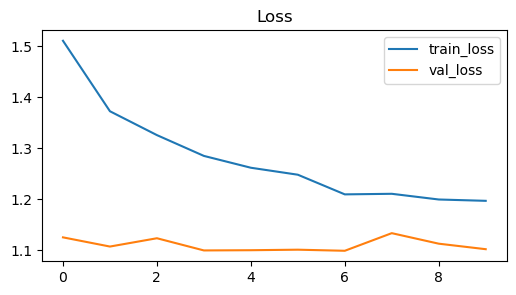

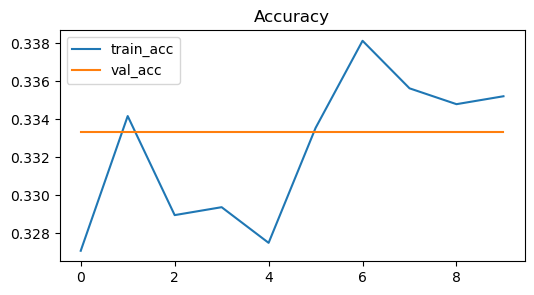

In [50]:
import matplotlib.pyplot as plt

# history from model.fit -> variable `history`
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss'); plt.show()

plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy'); plt.show()


In [51]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
val_steps = int(np.ceil(val_gen.samples / val_gen.batch_size))
preds = model.predict(val_gen, steps=val_steps, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes
target_names = list(val_gen.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=target_names))
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)


38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 737ms/step
              precision    recall  f1-score   support

  elliptical       0.33      1.00      0.50       400
       other       0.00      0.00      0.00       400
      spiral       0.00      0.00      0.00       400

    accuracy                           0.33      1200
   macro avg       0.11      0.33      0.17      1200
weighted avg       0.11      0.33      0.17      1200

Confusion matrix:
 [[400   0   0]
 [400   0   0]
 [400   0   0]]


C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [52]:
# Inspect generators
print("train_gen.class_indices:", train_gen.class_indices)
import numpy as np
unique, counts = np.unique(train_gen.classes, return_counts=True)
print("train class counts (by index):", dict(zip(unique, counts)))
# map index->label
idx_to_label = {v:k for k,v in train_gen.class_indices.items()}
print("index->label:", idx_to_label)

unique_val, counts_val = np.unique(val_gen.classes, return_counts=True)
print("val class counts (by index):", dict(zip(unique_val, counts_val)))


train_gen.class_indices: {'elliptical': 0, 'other': 1, 'spiral': 2}
train class counts (by index): {0: 1600, 1: 1600, 2: 1600}
index->label: {0: 'elliptical', 1: 'other', 2: 'spiral'}
val class counts (by index): {0: 400, 1: 400, 2: 400}


In [53]:
# examine one batch
x_batch, y_batch = next(train_gen)
print("x_batch.shape:", x_batch.shape)
print("y_batch.shape (one-hot):", y_batch.shape)
# show label distribution in the batch
labels_in_batch = y_batch.argmax(axis=1)
import numpy as np
print("batch label counts:", dict(zip(*np.unique(labels_in_batch, return_counts=True))))
# show mapping of columns -> label names
print("label index -> name:", {i:name for name,i in train_gen.class_indices.items()})


x_batch.shape: (32, 128, 128, 3)
y_batch.shape (one-hot): (32, 3)
batch label counts: {0: 10, 1: 14, 2: 8}
label index -> name: {0: 'elliptical', 1: 'other', 2: 'spiral'}


spiral 506409.jpg


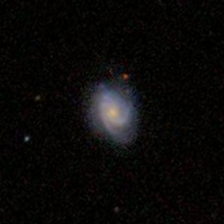

other 845099.jpg


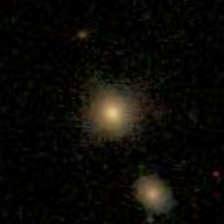

elliptical 861855.jpg


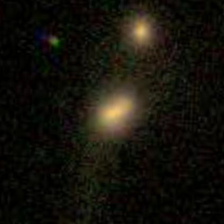

In [54]:
from PIL import Image
# sample one filename per class from df_use (the dataframe you built earlier)
for label in train_df['target'].unique():
    file_sample = train_df[train_df['target']==label].iloc[0]['img_file']
    print(label, file_sample)
    display(Image.open(TRAIN_IMG_DIR / file_sample).resize((224,224)))


In [56]:
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# 1) Locate base (EfficientNetB0) used in your model. We assume 'base' variable exists.
# If not, find it like:
# for layer in model.layers:
#     print(layer.name, type(layer))

# Freeze base
base = None
for layer in model.layers:
    # find first layer that is not the input and has 4D output -> likely base
    if len(getattr(layer, "output_shape", ())) == 4:
        base = layer
        break

if base is None:
    # fallback if base variable exists already in your session
    base = model.layers[1]

base.trainable = False
print("Base layer found:", base.name)

# 2) Build a new head on top of the frozen base
inputs = model.input
x = base(inputs, training=False) if hasattr(base, '__call__') else model.layers[1].output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(len(train_gen.class_indices), activation='softmax')(x)

head_model = models.Model(inputs, outputs)

# 3) (Important) reinitialize the new Dense head weights (they are fresh by construction)
# Compile with a moderately higher LR for the head so it learns quickly
head_model.compile(optimizer=optimizers.Adam(learning_rate=5e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# 4) Train the head for a bit (treat this as warm-up)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('head_only_best.h5', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

history_head = head_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,   # train the head a bit longer
    callbacks=callbacks
)

# Save the head-trained model
head_model.save('galaxy_head_trained.keras')
print("Head-only training finished.")


Base layer found: efficientnetb0
Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.3362 - loss: 1.4781

150/150 ━━━━━━━━━━━━━━━━━━━━ 131s 750ms/step - accuracy: 0.3362 - loss: 1.4777 - val_accuracy: 0.3333 - val_loss: 1.1091 - learning_rate: 5.0000e-04
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 108s 718ms/step - accuracy: 0.3302 - loss: 1.2785 - val_accuracy: 0.3333 - val_loss: 1.1678 - learning_rate: 5.0000e-04
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.3215 - loss: 1.2369
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
150/150 ━━━━━━━━━━━━━━━━━━━━ 108s 719ms/step - accuracy: 0.3215 - loss: 1.2368 - val_accuracy: 0.3333 - val_loss: 1.1983 - learning_rate: 5.0000e-04
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 108s 721ms/step - accuracy: 0.3386 - loss: 1.1837 - val_accuracy: 0.3333 - val_loss: 1.1110 - learning_rate: 2.5000e-04
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.3486 - loss: 1.1606
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
150/150 ━━━━━━━━━━━━━━━━━━━━ 111s 740ms/step - accuracy: 0

In [58]:
# attach base from head_model construction
# If you used `base` above, it still points to the base layer.
base.trainable = True

# Freeze all but last N layers of the backbone
N = 40  # try 20 if GPU memory is tight; adjust
for i, layer in enumerate(base.layers):
    layer.trainable = True if i >= (len(base.layers) - N) else False

# Recompile at small LR
head_model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Fine-tune
fine_callbacks = [
    tf.keras.callbacks.ModelCheckpoint('finetuned_best.h5', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)
]

fine_history = head_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=fine_callbacks
)
head_model.save('galaxy_finetuned_partial.keras')
print("Partial fine-tuning finished.")


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.3342 - loss: 1.4139

150/150 ━━━━━━━━━━━━━━━━━━━━ 158s 877ms/step - accuracy: 0.3342 - loss: 1.4140 - val_accuracy: 0.3333 - val_loss: 1.2076 - learning_rate: 1.0000e-05
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.3357 - loss: 1.3982

150/150 ━━━━━━━━━━━━━━━━━━━━ 128s 850ms/step - accuracy: 0.3357 - loss: 1.3982 - val_accuracy: 0.3333 - val_loss: 1.1702 - learning_rate: 1.0000e-05
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 126s 840ms/step - accuracy: 0.3373 - loss: 1.3818 - val_accuracy: 0.3333 - val_loss: 1.2076 - learning_rate: 1.0000e-05
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.3317 - loss: 1.4104
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
150/150 ━━━━━━━━━━━━━━━━━━━━ 128s 850ms/step - accuracy: 0.3317 - loss: 1.4104 - val_accuracy: 0.3333 - val_loss: 1.1815 - learning_rate: 1.0000e-05
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 128s 853ms/step - accuracy: 0.3362 - loss: 1.3785 - val_accuracy: 0.3333 - val_loss: 1.1890 - learning_rate: 5.0000e-06
Partial fine-tuning finished.


In [59]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
val_steps = int(np.ceil(val_gen.samples / val_gen.batch_size))
preds = model.predict(val_gen, steps=val_steps, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes
target_names = list(val_gen.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=target_names))
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step
              precision    recall  f1-score   support

  elliptical       0.00      0.00      0.00       400
       other       0.33      1.00      0.50       400
      spiral       0.00      0.00      0.00       400

    accuracy                           0.33      1200
   macro avg       0.11      0.33      0.17      1200
weighted avg       0.11      0.33      0.17      1200

Confusion matrix:
 [[  0 400   0]
 [  0 400   0]
 [  0 400   0]]


C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f